In [4]:
import os
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits

# Directory containing perspective images
data_dir = "../perspective_data/perspective_data_linear_fits_64x64_ecliptic"

# Get all .fits files (sorted for consistency)
fits_files = sorted([f for f in os.listdir(data_dir) if f.endswith(".fits")])

print(f"Found {len(fits_files)} FITS files to display:")
for fname in fits_files:
    print(fname)

Found 100 FITS files to display:
output_tensor_000_hgln_-180.0_hglt_0.0.fits
output_tensor_001_hgln_-176.4_hglt_0.0.fits
output_tensor_002_hgln_-172.7_hglt_0.0.fits
output_tensor_003_hgln_-169.1_hglt_0.0.fits
output_tensor_004_hgln_-165.5_hglt_0.0.fits
output_tensor_005_hgln_-161.8_hglt_0.0.fits
output_tensor_006_hgln_-158.2_hglt_0.0.fits
output_tensor_007_hgln_-154.5_hglt_0.0.fits
output_tensor_008_hgln_-150.9_hglt_0.0.fits
output_tensor_009_hgln_-147.3_hglt_0.0.fits
output_tensor_010_hgln_-143.6_hglt_0.0.fits
output_tensor_011_hgln_-140.0_hglt_0.0.fits
output_tensor_012_hgln_-136.4_hglt_0.0.fits
output_tensor_013_hgln_-132.7_hglt_0.0.fits
output_tensor_014_hgln_-129.1_hglt_0.0.fits
output_tensor_015_hgln_-125.5_hglt_0.0.fits
output_tensor_016_hgln_-121.8_hglt_0.0.fits
output_tensor_017_hgln_-118.2_hglt_0.0.fits
output_tensor_018_hgln_-114.5_hglt_0.0.fits
output_tensor_019_hgln_-110.9_hglt_0.0.fits
output_tensor_020_hgln_-107.3_hglt_0.0.fits
output_tensor_021_hgln_-103.6_hglt_0.0.fits

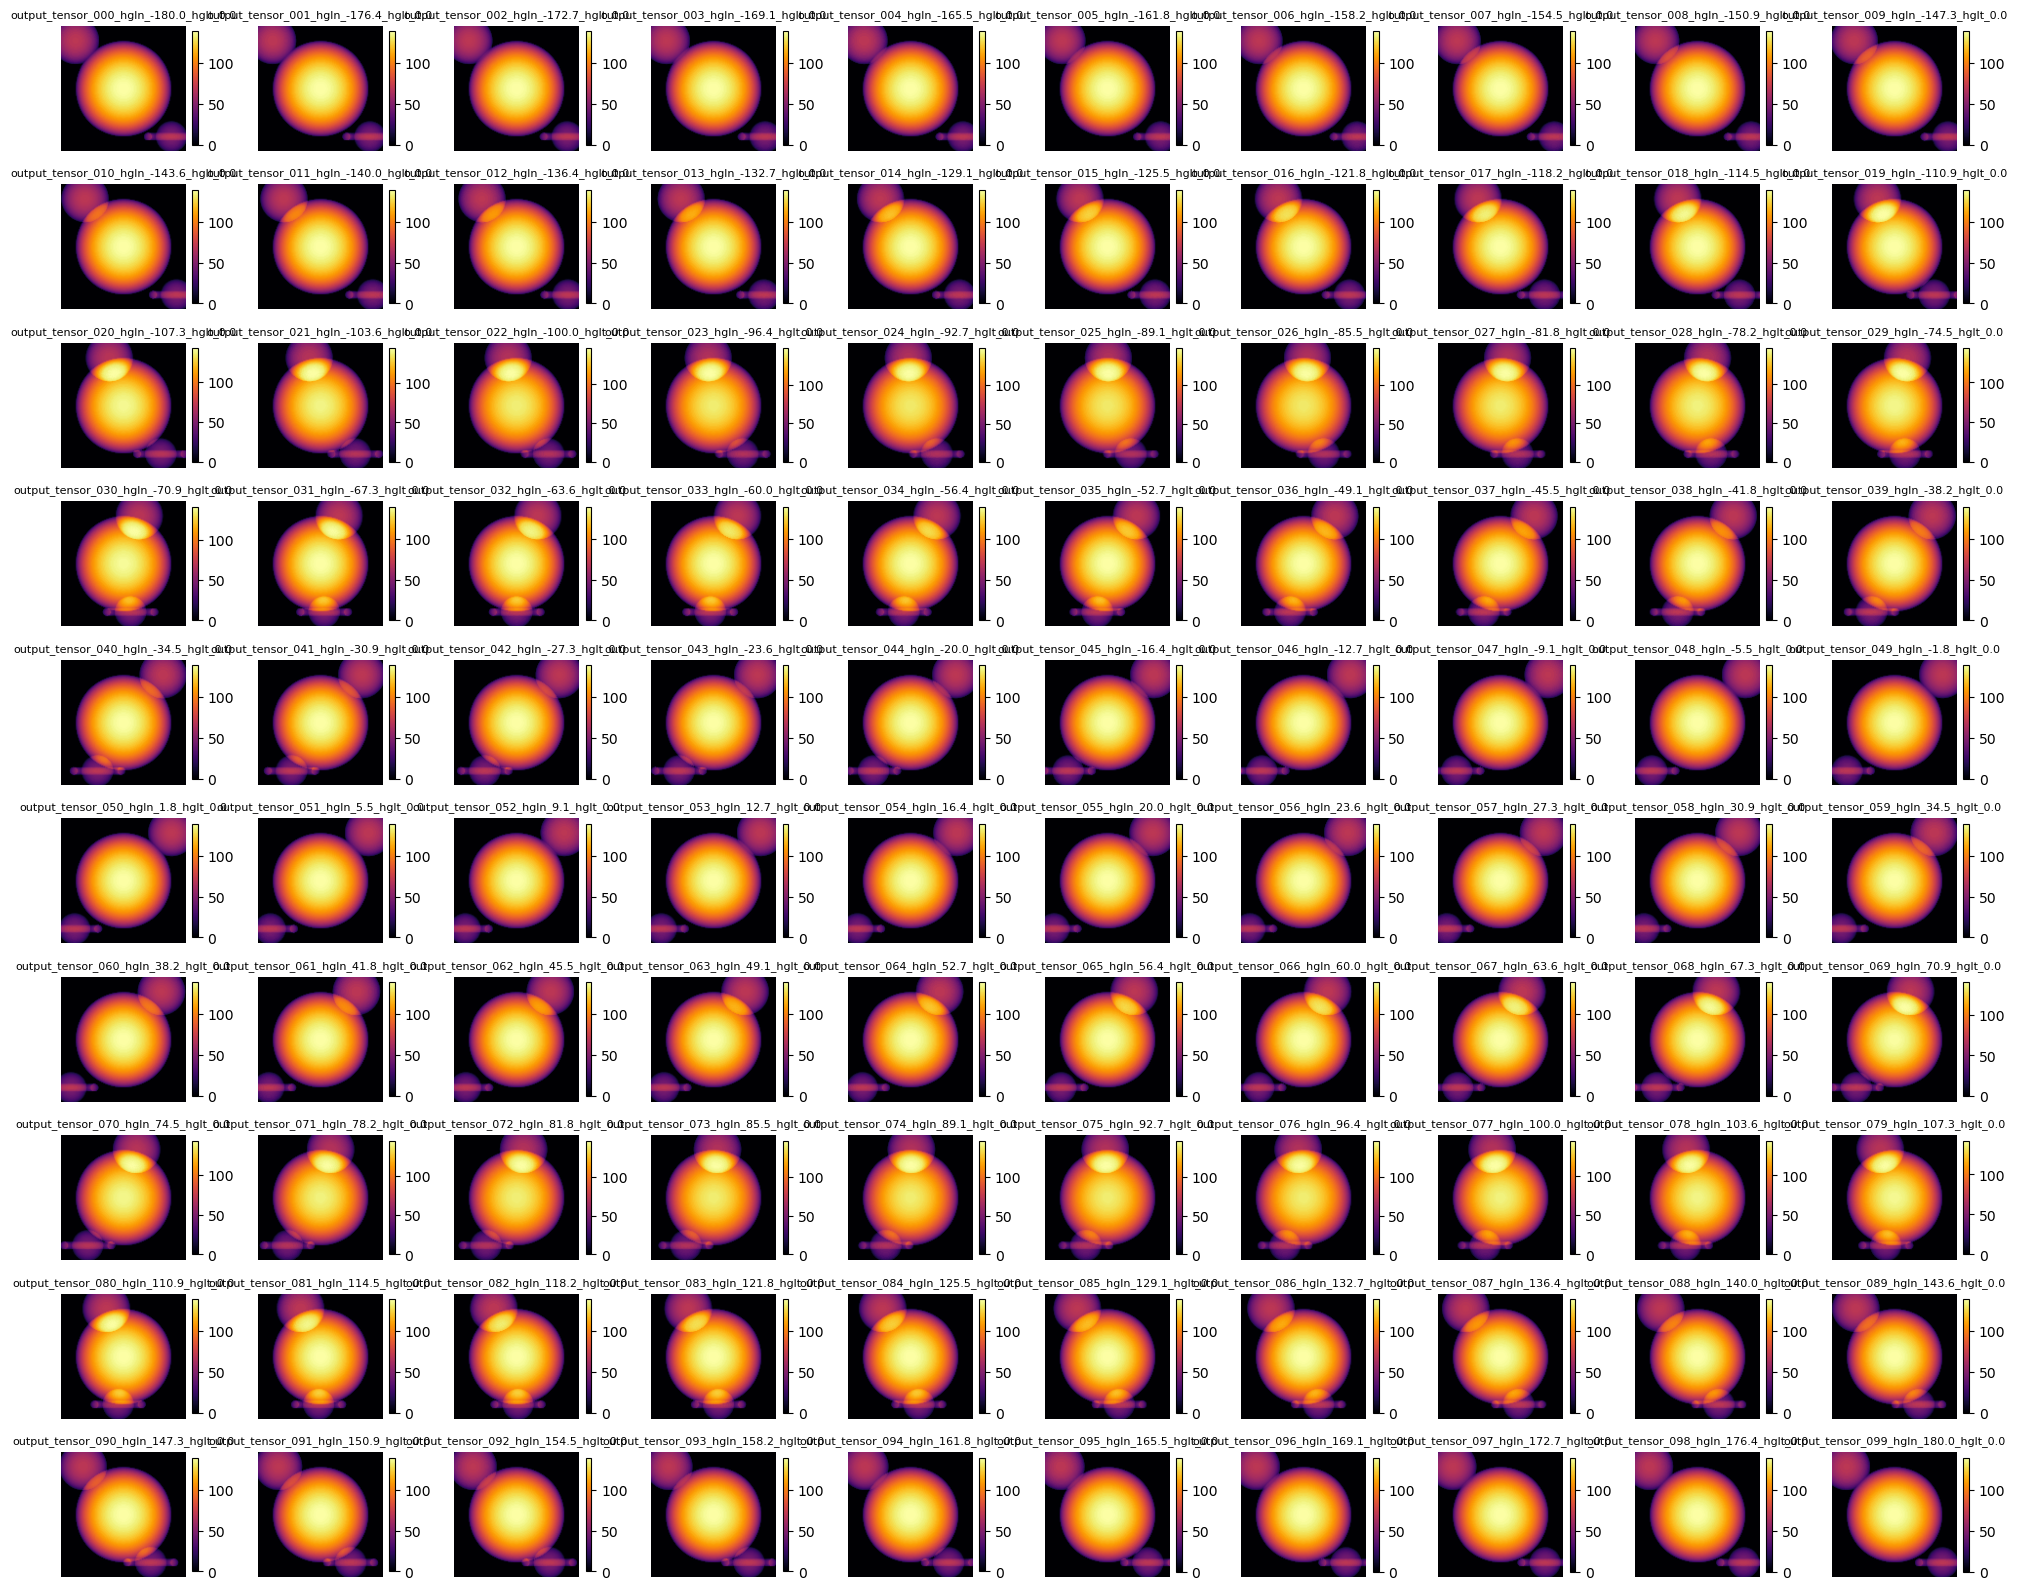

Displayed 100 images in a 10x10 grid.


In [5]:
# Plot all FITS images with dynamic grid layout
num_images = len(fits_files)

if num_images == 0:
    print("No FITS files found to plot.")
else:
    # Calculate optimal grid layout
    # Aim for roughly square grid, with more columns than rows if needed
    cols = int(np.ceil(np.sqrt(num_images)))
    rows = int(np.ceil(num_images / cols))
    
    # Adjust figure size based on number of images
    fig_width = min(20, cols * 4)  # Max width of 20, 4 inches per column
    fig_height = min(16, rows * 3)  # Max height of 16, 3 inches per row
    
    fig, axes = plt.subplots(rows, cols, figsize=(fig_width, fig_height))
    
    # Handle case where we have only one subplot
    if num_images == 1:
        axes = [axes]
    elif rows == 1 or cols == 1:
        axes = axes.flatten() if hasattr(axes, 'flatten') else [axes]
    else:
        axes = axes.flatten()
    
    for i, fname in enumerate(fits_files):
        img = fits.getdata(os.path.join(data_dir, fname))
        ax = axes[i]
        im = ax.imshow(img, origin='lower', cmap='inferno')
        ax.set_title(fname.replace(".fits", ""), fontsize=8)
        ax.axis('off')
        
        # Add colorbar with adjusted size for smaller plots
        cbar_fraction = 0.046 if num_images <= 10 else 0.035
        fig.colorbar(im, ax=ax, fraction=cbar_fraction, pad=0.04)
    
    # Hide any unused subplots
    for i in range(num_images, len(axes)):
        axes[i].axis('off')
    
    plt.tight_layout()
    plt.show()
    
    print(f"Displayed {num_images} images in a {rows}x{cols} grid.")